# Pitch Perfect - Exploring Major League Baseball Pitcher Data


### By: The Group 3 Times: Sam, Hadriana, Katie, John, Jonah

<img src="https://pbs.twimg.com/media/FFpyFFTVIAIvuGI?format=jpg&name=medium">

# Introduction

### Prologue: 

One of the most valuable assets in all of sports is a quality starting pitcher. More than a star quarterback or a stud point guard, a true ace pitcher can almost entirely dictate a win or a loss for his team. Finding these excellent  pitchers can be difficult to find though - they don't exact grow on trees. We have set out to discover which attributes and factors lead to MLB pitcher success. Are there certain factors that correlate more to success than others? What should a team be looking for when analyzing a pitcher? We are on a mission to identify those factors. 


Luckily, baseball is a data-rich sport. Via baseballsavant.com, there is ample data that gives us the opportunity to identify trends among various pitchers.

### The Set-Up:
To begin, we made a classification - we are dividing pitchers into three broad types: starters, relievers, and closers. For those less familiar with baseball, The Group 3 Times has provided the following definitions:

A starter pitches every 3-5 days, and usually throws 80-100 pitches across 5 innings. 
Relievers pitch every 2-3 days, and usually throw 20-30 pitches across 1-2 innings. 
Closers usually throw 10-20 pitches in 1 inning: the 9th inning. 

If you're feeling frisky, you can follow along at home, while we detail below how we filtered the categories via baseballsavant.com.

<img src="https://pbs.twimg.com/media/FFp6hZLVcAAm7Ci?format=jpg&name=large">


### Import & Load the Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import HTML, Markdown, display
import seaborn as sns
import numpy as np
import shapely
import json
import plotly

pd.set_option('display.max_columns', None)
SP_df = pd.read_csv('../data/Project_Data_Files/Project_Starters.csv')
RP_df = pd.read_csv('../data/Project_Data_Files/Project_Relievers.csv')
CP_df = pd.read_csv('../data/Project_Data_Files/Project_Closers.csv')

RP_df['absolute_value_horizontal_release_point'] = RP_df['horizontal_release_point'].abs()
SP_df['absolute_value_horizontal_release_point'] = SP_df['horizontal_release_point'].abs()
CP_df['absolute_value_horizontal_release_point'] = CP_df['horizontal_release_point'].abs()

### Previewing the Data

Before we apply the ["Start Big and Drill Down Approach"](http://mediashift.org/2015/06/exploring-the-7-different-types-of-data-stories/), let's give you a taste of the data we are working with:

In [2]:
SP_df.head(3)

pitches  player_id         player_name  total_pitches  pitch_percent  \
0     1893     571760      Heaney, Andrew           2330           81.2   
1     2566     640455        Manaea, Sean           2980           86.1   
2     1971     518516  Bumgarner, Madison           2294           85.9   

      ba    iso  babip    slg   woba  xwoba    xba  hits  abs  launch_speed  \
0  0.236  0.231  0.273  0.467  0.327  0.295  0.214    95  403          88.9   
1  0.256  0.157  0.324  0.414  0.309  0.316  0.256   153  597          89.9   
2  0.247  0.192  0.280  0.439  0.315  0.322  0.247   116  469          88.6   

   launch_angle  spin_rate  velocity  effective_speed  whiffs  swings  takes  \
0          18.6       2399      87.6            87.03     265     916    977   
1          12.3       1848      89.0            90.03     364    1317   1249   
2          18.8       2318      85.7            85.77     215     970   1001   

   eff_min_vel  release_extension  pos3_int_start_distance  \
0         -0.6               6.11                      111   
1          1.0               7.18                      110   
2          0.1               6.55                      109   

   pos4_int_start_distance  pos5_int_start_distance  pos6_int_start_distance  \
0                      155                      118                      147   
1                      151                      120                      150   
2                      153                      118                      149   

   pos7_int_start_distance  pos8_int_start_distance  pos9_int_start_distance  \
0                      303                      325                      293   
1                      301                      326                      299   
2                      300                      327                      296   

   horizontal_release_point  vertical_release_point  \
0                      3.41                    5.31   
1                      3.31                    5.65   
2                      3.26                    5.70   

   absolute_value_horizontal_release_point  
0                                     3.41  
1                                     3.31  
2                                     3.26

In [3]:
RP_df.head(3)

pitches  player_id    player_name  total_pitches  pitch_percent     ba  \
0      900     518617  Diekman, Jake           1118           80.5  0.217   
1      944     608718   Suter, Brent           1221           77.3  0.256   
2      851     656945  Scott, Tanner           1032           82.5  0.249   

     iso  babip    slg   woba  xwoba    xba  hits  abs  launch_speed  \
0  0.211  0.287  0.428  0.330  0.327  0.217    39  180          89.1   
1  0.163  0.294  0.419  0.319  0.312  0.246    55  215          84.4   
2  0.142  0.330  0.391  0.334  0.337  0.241    42  169          90.7   

   launch_angle  spin_rate  velocity  effective_speed  whiffs  swings  takes  \
0          15.5       2386      91.2            88.51     143     391    509   
1           6.7       2144      85.9            86.61      93     461    483   
2           6.9       2620      92.3            92.09     136     373    478   

   eff_min_vel  release_extension  pos3_int_start_distance  \
0         -2.7               6.34                      111   
1          0.7               7.12                      108   
2         -0.2               6.20                      108   

   pos4_int_start_distance  pos5_int_start_distance  pos6_int_start_distance  \
0                      150                      120                      150   
1                      153                      118                      147   
2                      151                      117                      148   

   pos7_int_start_distance  pos8_int_start_distance  pos9_int_start_distance  \
0                      300                      326                      301   
1                      300                      324                      299   
2                      300                      323                      294   

   horizontal_release_point  vertical_release_point  \
0                      3.27                    5.72   
1                      2.82                    6.21   
2                      2.50                    5.53   

   absolute_value_horizontal_release_point  
0                                     3.27  
1                                     2.82  
2                                     2.50

In [4]:
CP_df.head(3)

pitches  player_id    player_name  total_pitches  pitch_percent     ba  \
0      876     623352    Hader, Josh            964           90.9  0.125   
1      603     543272     Hand, Brad           1076           56.0  0.188   
2      747     642397  Soto, Gregory           1131           66.0  0.204   

     iso  babip    slg   woba  xwoba    xba  hits  abs  launch_speed  \
0  0.057  0.227  0.182  0.202  0.238  0.157    22  176          87.4   
1  0.143  0.213  0.331  0.275  0.321  0.241    25  133          85.6   
2  0.172  0.240  0.376  0.307  0.317  0.212    32  157          89.0   

   launch_angle  spin_rate  velocity  effective_speed  whiffs  swings  takes  \
0          22.2       2137      92.1            87.26     145     440    436   
1          15.4       2346      87.4            86.04      52     244    359   
2          13.1       2378      94.7            95.23     101     344    403   

   eff_min_vel  release_extension  pos3_int_start_distance  \
0         -4.8               6.65                      110   
1         -1.4               5.57                      110   
2          0.5               6.76                      108   

   pos4_int_start_distance  pos5_int_start_distance  pos6_int_start_distance  \
0                      153                      117                      148   
1                      152                      115                      149   
2                      153                      118                      149   

   pos7_int_start_distance  pos8_int_start_distance  pos9_int_start_distance  \
0                      306                      327                      302   
1                      304                      323                      296   
2                      299                      328                      299   

   horizontal_release_point  vertical_release_point  \
0                      3.17                    5.22   
1                      2.46                    6.22   
2                      1.98                    5.64   

   absolute_value_horizontal_release_point  
0                                     3.17  
1                                     2.46  
2                                     1.98

### Start Big and Drill Down: Pitcher Type Data Analysis 

Wow. That's a lot of data. There are a lot of metrics that could be looked at here. We're going to narrow it down to three big factors that we're going to look for in order to find correlation within each pitcher category:


1) Release Extension and Batting Average

2) Horizontal Release Point and Exit Velocity

3) Velocity and Whiffs


Note that each pairing has an input and an output. For example, the pitcher could throw with a higher velocity or a lower velocity, and that would result in more or fewer whiffs (more on whiffs later).

# Block 1: Release Extension and Batting Average

**Input:** [**Release Extension**](https://www.mlb.com/glossary/statcast/extension) of pitch in feet, as tracked by Statcast.

A pitcher must begin his throwing motion while standing on the pitching rubber - which is 60 feet and 6 inches away from home plate. This, however, does not mean pitches are actually thrown from 60 feet and 6 inches away from the plate.


The point at which a pitcher releases the ball is actually a few feet closer to home plate than the pitching rubber itself. Extension quantifies exactly how much closer a pitcher's release point is to home plate. Taller pitchers with long wingspans tend to have the longest extensions, because their frames allow them to hold on to the ball for a greater distance before releasing it.


Not surprisingly, a longer extension can be a major advantage to pitchers, because they are essentially shortening the distance between themselves and opposing batters. For example, a pitcher with a longer extension can make a 93 mph fastball look like a 96 mph fastball.

<img src="https://img.mlbstatic.com/mlb-images/image/private/ar_16:9,g_auto,q_auto:good,w_1024,c_fill,f_jpg/mlb/xccuv9zyxwchn15f3si9">




**Output: Batting Average**

One of the oldest and most universal tools to measure a hitter's success at the plate, batting average is determined by dividing a player's hits by his total at-bats for a number between zero (shown as .000) and one (1.000). In recent years, the league-wide batting average has typically hovered around .250.

### Plots

Let's first start by plotting these two variables:

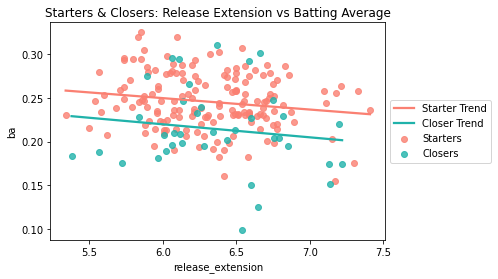

In [5]:
sns.regplot(x="release_extension", y="ba", ci=None, data = SP_df, scatter_kws={"color": "salmon"}, line_kws={"color": "salmon"})
sns.regplot(x="release_extension", y="ba", ci=None, data = CP_df, scatter_kws={"color": "lightseagreen"}, line_kws={"color": "lightseagreen"}).set(title = 'Starters & Closers: Release Extension vs Batting Average')

labels =['Starter Trend', 'Closer Trend', 'Starters', 'Closers']
plt.legend(labels=labels, loc='center left', bbox_to_anchor=(1, 0.5))

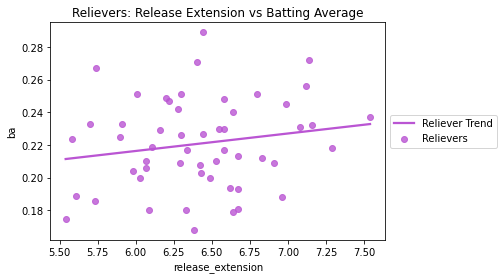

In [6]:
sns.regplot(x="release_extension", y="ba", ci=None, data = RP_df, scatter_kws={"color": "mediumorchid"}, line_kws={"color": "mediumorchid"}).set(title = 'Relievers: Release Extension vs Batting Average')

labels =['Reliever Trend', 'Relievers']
plt.legend(labels=labels, loc='center left',  bbox_to_anchor=(1, 0.5))

Interesting. For starters and closers, a longer release extension results in a lower batting average, as expected. But for relievers, the longer the release extension, the <strong><em>higher</em></strong> the batting average!

## Out, Liar!

Let's see now how many outliers there are in these groups and identify them!

### T-Rex Pitchers

Let's first start with pitchers that have a low release extension, yet are still dominant. Think of these guys as a T-Rex: short arms, but still dangerous.

<img src="https://mlblogsbensbiz.files.wordpress.com/2010/05/reading_dinosaur_ralph20trout2.jpg">



In [7]:
# Create filter where the vertical release extension is below 5.85 ft and for batting average below .220
sp_filt = SP_df[(SP_df['release_extension'] < 5.85) & (SP_df['ba'] <= .200)]
rp_filt = RP_df[(RP_df['release_extension'] < 5.85) & (RP_df['ba'] <= .200)]
cp_filt = CP_df[(CP_df['release_extension'] < 5.85) & (CP_df['ba'] <= .200)]

# Group the pitch_filters by players and use the count function
sp_count = sp_filt['player_name'].count()
rp_count = rp_filt['player_name'].count()
cp_count = cp_filt['player_name'].count()

sp_title = 'The number of starters that have a vertical release extension < 6 ft and batting average against at or below .220'
print(sp_title)
print('-'*len(sp_title))
print(sp_count)

rp_title = 'The number of relievers that have a vertical release extension < 6 ft and batting average against at or below .220'
print(rp_title)
print('-'*len(rp_title))
print(rp_count)

cp_title = 'The number of closers that have a vertical release extension < 6 ft and batting average against at or below .220'
print(cp_title)
print('-'*len(cp_title))
print(cp_count)

print("\nStarters with this criteria make up just", round(sp_count/(SP_df['player_name'].count()) * 100, 3), "% of all starters"  )
print("\nRelievers with this criteria make up just", round(rp_count/(RP_df['player_name'].count()) * 100, 3), "% of all relievers"  )
print("\nClosers with this criteria make up just", round(cp_count/(CP_df['player_name'].count()) * 100, 3), "% of all closers"  )

The number of starters that have a vertical release extension < 6 ft and batting average against at or below .220
-----------------------------------------------------------------------------------------------------------------
0
The number of relievers that have a vertical release extension < 6 ft and batting average against at or below .220
------------------------------------------------------------------------------------------------------------------
3
The number of closers that have a vertical release extension < 6 ft and batting average against at or below .220
----------------------------------------------------------------------------------------------------------------
3

Starters with this criteria make up just 0.0 % of all starters

Relievers with this criteria make up just 5.66 % of all relievers

Closers with this criteria make up just 7.895 % of all closers


There are NO T-Rex starters, but we do have 6 total T-Rexes among the relievers and closers - 3 of each.

In [8]:
#Our 6-Tex Rexes
combo = rp_filt.append(cp_filt)
combo

pitches  player_id         player_name  total_pitches  pitch_percent  \
28      890     502202     Boxberger, Brad           1074           82.9   
37      911     606149  Gallegos, Giovanny           1236           73.7   
49      935     595014      Treinen, Blake           1095           85.4   
1       603     543272          Hand, Brad           1076           56.0   
11      513     650895     Castillo, Diego            936           54.8   
27      325     606149  Gallegos, Giovanny           1236           26.3   

       ba    iso  babip    slg   woba  xwoba    xba  hits  abs  launch_speed  \
28  0.189  0.126  0.261  0.316  0.262  0.284  0.206    36  190          86.2   
37  0.186  0.105  0.255  0.290  0.235  0.271  0.210    39  210          87.6   
49  0.175  0.069  0.238  0.244  0.232  0.247  0.190    38  217          83.2   
1   0.188  0.143  0.213  0.331  0.275  0.321  0.241    25  133          85.6   
11  0.184  0.123  0.257  0.307  0.247  0.240  0.180    21  114          85.7   
27  0.176  0.162  0.222  0.338  0.256  0.273  0.195    12   68          88.0   

    launch_angle  spin_rate  velocity  effective_speed  whiffs  swings  takes  \
28          19.0       2182      90.0            84.18     132     407    483   
37          19.5       2376      90.1            88.96     162     473    438   
49          10.1       2388      92.3            90.53     128     457    478   
1           15.4       2346      87.4            86.04      52     244    359   
11           6.0       2164      89.6            87.73      86     250    263   
27          26.1       2406      90.8            89.85      58     163    162   

    eff_min_vel  release_extension  pos3_int_start_distance  \
28         -5.8               5.61                      110   
37         -1.1               5.73                      115   
49         -1.8               5.54                      112   
1          -1.4               5.57                      110   
11         -1.9               5.38                      109   
27         -1.0               5.72                      116   

    pos4_int_start_distance  pos5_int_start_distance  pos6_int_start_distance  \
28                      155                      118                      148   
37                      154                      117                      147   
49                      156                      114                      150   
1                       152                      115                      149   
11                      157                      117                      148   
27                      159                      118                      149   

    pos7_int_start_distance  pos8_int_start_distance  pos9_int_start_distance  \
28                      300                      324                      299   
37                      298                      319                      300   
49                      299                      318                      293   
1                       304                      323                      296   
11                      301                      322                      294   
27                      302                      328                      305   

    horizontal_release_point  vertical_release_point  \
28                     -1.62                    5.71   
37                     -2.20                    6.57   
49                     -3.08                    6.32   
1                       2.46                    6.22   
11                     -0.86                    5.73   
27                     -2.13                    6.61   

    absolute_value_horizontal_release_point  
28                                     1.62  
37                                     2.20  
49                                     3.08  
1                                      2.46  
11                                     0.86  
27                                     2.13

Giovanny served as both a closer and reliever, and hence we respect him in each role within the data.

In [9]:
#Filtering for the max absolute value horizontal Release point
high_horiz = combo["absolute_value_horizontal_release_point"] == combo["absolute_value_horizontal_release_point"].max()
playern = combo[high_horiz]
playern

pitches  player_id     player_name  total_pitches  pitch_percent     ba  \
49      935     595014  Treinen, Blake           1095           85.4  0.175   

      iso  babip    slg   woba  xwoba   xba  hits  abs  launch_speed  \
49  0.069  0.238  0.244  0.232  0.247  0.19    38  217          83.2   

    launch_angle  spin_rate  velocity  effective_speed  whiffs  swings  takes  \
49          10.1       2388      92.3            90.53     128     457    478   

    eff_min_vel  release_extension  pos3_int_start_distance  \
49         -1.8               5.54                      112   

    pos4_int_start_distance  pos5_int_start_distance  pos6_int_start_distance  \
49                      156                      114                      150   

    pos7_int_start_distance  pos8_int_start_distance  pos9_int_start_distance  \
49                      299                      318                      293   

    horizontal_release_point  vertical_release_point  \
49                     -3.08                    6.32   

    absolute_value_horizontal_release_point  
49                                     3.08

Among all our T-Rexes, **Blake Treinen** has one of the highest horizontal release points. Let's look into this more.

# Block 2: Horizontal Release Point and Exit Velocity

**Input: Horizontal Release Point** of the ball measured in feet from the catcher's perspective.


<img src="https://pbs.twimg.com/media/FFqKGsJaQAAT1bV?format=jpg&name=large">


Output: **Exit Velocity** - also known as launch speed.

Exit velocity measures the speed of the baseball as it comes off the bat, immediately after a batter makes contact. This is tracked for all Batted Ball Events - outs, hits, and errors.

Attaining a high exit velocity is one of a hitter's primary goals. A hard-hit ball won't always have a positive result, but the defense has less time to react, so the batter's chances of reaching base are higher.

For this very reason, exit velocity can also be used to evaluate pitchers. The game's best pitchers - who naturally throw the highest quality pitches - generally rank among the league leaders at limiting hard contact.


<em>Exit Velocity Note: Keep in mind that the less the velocity, the more effective the pitcher, because a pitcher's goal is to have the batter hit very slow balls that are easy to catch (if not strike out).</em>

### Plots

Text(0, 0.5, 'Launch Speed (mph)')

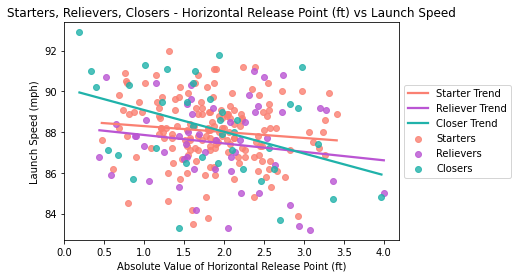

In [10]:
sns.regplot(x="absolute_value_horizontal_release_point", y="launch_speed", ci=None, data = SP_df, scatter_kws={"color": "salmon"}, line_kws={"color": "salmon"})
sns.regplot(x="absolute_value_horizontal_release_point", y="launch_speed", ci=None, data = RP_df, scatter_kws={"color": "mediumorchid"}, line_kws={"color": "mediumorchid"})
sns.regplot(x="absolute_value_horizontal_release_point", y="launch_speed", ci=None, data = CP_df, scatter_kws={"color": "lightseagreen"}, line_kws={"color": "lightseagreen"}).set(title = 'Starters, Relievers, Closers - Horizontal Release Point (ft) vs Launch Speed')

labels =['Starter Trend', 'Reliever Trend', 'Closer Trend', 'Starters', 'Relievers', 'Closers']
plt.legend(labels=labels, loc='center left',  bbox_to_anchor=(1, 0.5))
plt.xlabel('Absolute Value of Horizontal Release Point (ft)')
plt.ylabel('Launch Speed (mph)')

The farther out the release point, the better success, as measured by exit velocity, with a lower number being better. We took the absolute value of the horizontal release point to treat righties (which have a positive horizontal release point) and lefties (which have a negative horizontal release point) the same.

### Bins

Let's subset this through bins, which enable us to treat pitchers with similar release points (i.e. between 0 and 1, 1 and 2, etc.) the same.

In [11]:
# Create bins with each horizontal release point
bins = pd.cut(SP_df['absolute_value_horizontal_release_point'], [
    0, 1, 2, 3, 4])

# Group the dataframe by bins with respect to launch speed and take the average
sp_speedbyreleasepoint = SP_df.groupby(bins)['launch_speed'].mean()
print('Starters Exit Velocity by Bins')
sp_speedbyreleasepoint

Starters Exit Velocity by Bins


absolute_value_horizontal_release_point
(0, 1]    88.546667
(1, 2]    88.054023
(2, 3]    87.880000
(3, 4]    88.125000
Name: launch_speed, dtype: float64

In [12]:
# Create bins with each horizontal release point
bins = pd.cut(RP_df['absolute_value_horizontal_release_point'], [
    0, 1, 2, 3, 4])

# Group the dataframe by bins with respect to launch speed and take the average
rp_speedbyreleasepoint = RP_df.groupby(bins)['launch_speed'].mean()
print('Relievers Exit Velocity by Bins')
rp_speedbyreleasepoint

Relievers Exit Velocity by Bins


absolute_value_horizontal_release_point
(0, 1]    87.814286
(1, 2]    87.623810
(2, 3]    87.465000
(3, 4]    86.420000
Name: launch_speed, dtype: float64

In [13]:
# Create bins with each horizontal release point
bins = pd.cut(CP_df['absolute_value_horizontal_release_point'], [
    0, 1, 2, 3, 4])

# Group the dataframe by bins with respect to launch speed and take the average
cp_speedbyreleasepoint = CP_df.groupby(bins)['launch_speed'].mean()
print('Closers Exit Velocity by Bins')
cp_speedbyreleasepoint

Closers Exit Velocity by Bins


absolute_value_horizontal_release_point
(0, 1]    89.157143
(1, 2]    88.723529
(2, 3]    87.490909
(3, 4]    85.633333
Name: launch_speed, dtype: float64

Text(0, 0.5, 'Launch Speed (mph)')

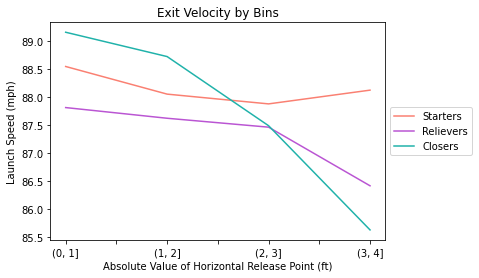

In [14]:
sp_speedbyreleasepoint.plot(color='salmon')
rp_speedbyreleasepoint.plot(color='mediumorchid')
cp_speedbyreleasepoint.plot(color='lightseagreen')

labels =['Starters', 'Relievers', 'Closers']
plt.legend(labels=labels, loc='center left',  bbox_to_anchor=(1, 0.5))

plt.title('Exit Velocity by Bins')
plt.xlabel('Absolute Value of Horizontal Release Point (ft)')
plt.ylabel('Launch Speed (mph)')

#### Starters

When looking at starters, when the absolute value of the horizontal release point is between 0 and 1, the average launch speed is 88.55 mph. When the absolute value of the horizontal release point is between 1 and 2, the average launch speed is 88.05 mph. When the absolute value of the horizontal release point is between 2 and 3, the average launch speed is 87.88 mph. When the absolute value of the horizontal release point is between 3 and 4, the average launch speed is 88.15 mph. This data shows that there is not a clear relationship between horizontal release point and launch speed for starters, indicating that a starter does not need to worry as much about perfecting (i.e. increasing) their horizontal release point to achieve success.


#### Relievers

When looking at relievers, when the absolute value of the horizontal release point is between 0 and 1, the average launch speed is 87.81 mph. When the absolute value of the horizontal release point is between 1 and 2, the average launch speed is 87.62 mph. When the absolute value of the horizontal release point is between 2 and 3, the average launch speed is 87.47 mph. When the absolute value of the horizontal release point is between 3 and 4, the average launch speed is 86.84 mph. This data shows that there is a negative relationship between horizontal release point and launch speed: as horizontal release point increases, launch speed decreases. 


#### Closers

When looking at closers, when the absolute value of the horizontal release point is between 0 and 1, the average launch speed is 89.15 mph. When the absolute value of the horizontal release point is between 1 and 2, the average launch speed is 88.73 mph. When the absolute value of the horizontal release point is between 2 and 3, the average launch speed is 87.49 mph. When the absolute value of the horizontal release point is between 3 and 4, the average launch speed is 85.63 mph. This data shows that there is a much stronger negative relationship between horizontal release point and launch speed among closers than among relievers and starters, indicating that it is more beneficial for a closer to perfect (i.e. increase) their horizontal release point to achieve success.

In [15]:
# Create filter where the horizontal release point is between 0 and 1 ft
filt1 = SP_df["absolute_value_horizontal_release_point"] > 0
filt2 = SP_df["absolute_value_horizontal_release_point"] <= 1


# Subset the data to run the players within that filter and sort that list by launch speed
launchspeedbetween0and1 = SP_df[filt1 & filt2].groupby('player_name')['launch_speed'].mean().sort_values()

# Print list
print("OUTLIERS")
title1='Lowest Exit Velocity among starters who threw with a horizontal release point between 0 and 1ft'
print(title1)
print('-'*len(title1))
print(launchspeedbetween0and1.head(3))
print()

# Create filter where the horizontal release point is between 3 and 4 ft
filt1 = SP_df["absolute_value_horizontal_release_point"] > 3
filt2 = SP_df["absolute_value_horizontal_release_point"] <= 4

# Subset the data to run the players within that filter and sort that list by launch speed
launchspeedbetween3and4 = SP_df[filt1 & filt2].groupby('player_name')['launch_speed'].mean().sort_values()

# Print list
title1='Highest Exit Velocity among starters who threw with a horizontal release point between 3 and 4 ft'
print(title1)
print('-'*len(title1))
print(launchspeedbetween3and4.tail(3))
print()

OUTLIERS
Lowest Exit Velocity among starters who threw with a horizontal release point between 0 and 1ft
-----------------------------------------------------------------------------------------------
player_name
Burnes, Corbin     84.5
Gray, Sonny        86.2
Buehler, Walker    86.8
Name: launch_speed, dtype: float64

Highest Exit Velocity among starters who threw with a horizontal release point between 3 and 4 ft
-------------------------------------------------------------------------------------------------
player_name
Bumgarner, Madison    88.6
Heaney, Andrew        88.9
Manaea, Sean          89.9
Name: launch_speed, dtype: float64



**Interesting nugget:** Based on their horizontal release point, Madison Bumgarner, Andrew Heaney, and Sean Manaea should be closers as their exaggerated wide horizontal release point would be more effective. 

On the flip side, we should be aware that Corbin Burnes, Sonny Gray, and Walker Buehler are really effective despite throwing from a horizontal release point near 0.

### Come here often, Blake Treinen?

Ok, so we know that relievers and closers that have a wide horizontal release point beyond 3 feet are generally more successful. Let's see who the top reliever and closer are among these wide throwers. 

In [16]:
# Create filter where the horizontal release point is between 3 and 4 ft
filt1 = RP_df["absolute_value_horizontal_release_point"] > 3
filt2 = RP_df["absolute_value_horizontal_release_point"] <= 4

# Subset the data to run the players within that filter and sort that list by launch speed
launchspeedbetween3and4 = RP_df[filt1 & filt2].groupby('player_name')['launch_speed'].mean().sort_values()

# Print list
title1='Lowest to Highest Exit Velocity among relievers threw with a horizontal release point between 3 and 4 ft'
print(title1)
print('-'*len(title1))
print(launchspeedbetween3and4)
print()

Lowest to Highest Exit Velocity among relievers threw with a horizontal release point between 3 and 4 ft
--------------------------------------------------------------------------------------------------------
player_name
Treinen, Blake    83.2
Rogers, Tyler     85.0
Cishek, Steve     85.6
Diekman, Jake     89.1
Shaw, Bryan       89.2
Name: launch_speed, dtype: float64



In [17]:
# Create filter where the horizontal release point is between 3 and 4 ft
filt1 = CP_df["absolute_value_horizontal_release_point"] > 3
filt2 = CP_df["absolute_value_horizontal_release_point"] <= 4

# Subset the data to run the players within that filter and sort that list by launch speed
launchspeedbetween3and4 = CP_df[filt1 & filt2].groupby('player_name')['launch_speed'].mean().sort_values()

# Print list
title1='Lowest to Highest Exit Velocity among closers threw with a horizontal release point between 3 and 4 ft'
print(title1)
print('-'*len(title1))
print(launchspeedbetween3and4)
print()

Lowest to Highest Exit Velocity among closers threw with a horizontal release point between 3 and 4 ft
------------------------------------------------------------------------------------------------------
player_name
Floro, Dylan     84.7
Rogers, Tyler    84.8
Hader, Josh      87.4
Name: launch_speed, dtype: float64



Hmm. Dylan Floro and Tyler Rogers have almost identical exit velocities. Let's break this tie based on who threw more pitches last season.

In [18]:
rogers_row = CP_df.loc[CP_df["player_name"] == "Rogers, Tyler" ]
floro_row = CP_df.loc[CP_df["player_name"] == "Floro, Dylan"]

rogers_pitches = int(rogers_row["total_pitches"])
floro_pitches = int(floro_row["total_pitches"])

print("Tyler Rogers threw ", rogers_pitches, " pitches.")
print("Dylan Floro threw ", floro_pitches, " pitches.")

print("Tyler Rogers threw ", rogers_pitches-floro_pitches, "more pitches than Dylan Floro" )
print("...so let's look at Tyler Rogers!")

Tyler Rogers threw  1129  pitches.
Dylan Floro threw  1076  pitches.
Tyler Rogers threw  53 more pitches than Dylan Floro
...so let's look at Tyler Rogers!


Now, looking at relievers, we see a familiar face: Blake Treinen. So Blake Treinen and Tyler Rogers are the most successful at throwing from a wide release point.

### Takeaway

Based on the data, horizontal release point is not that big of an indicator of pitcher success, but it is more of an indicator among closers and relievers than starters. For both closers and relievers, having a wider, higher horizontal release point tends to lead to a lower launch speed, making them more effective and successful pitchers. 

Among these pitchers, Blake Treinen and Tyler Rogers are great at throwing from a quirky wide release.

# Block 3: Pitch Velocity and Whiffs - Are Closers the Best for This?

### Why is velocity so important?
* One of the most effective attributes a closer can have in their arsenal:
    - Effective way to strike out a batter
    - Effective way to keep the batter off balance (tough for a batter to anticipate a high velocity pitch)
    - Ball movement on a velocity pitch can become nearly unhittable for a batter

It takes 400 milliseconds for a 90-95 mph pitch to reach home plate.

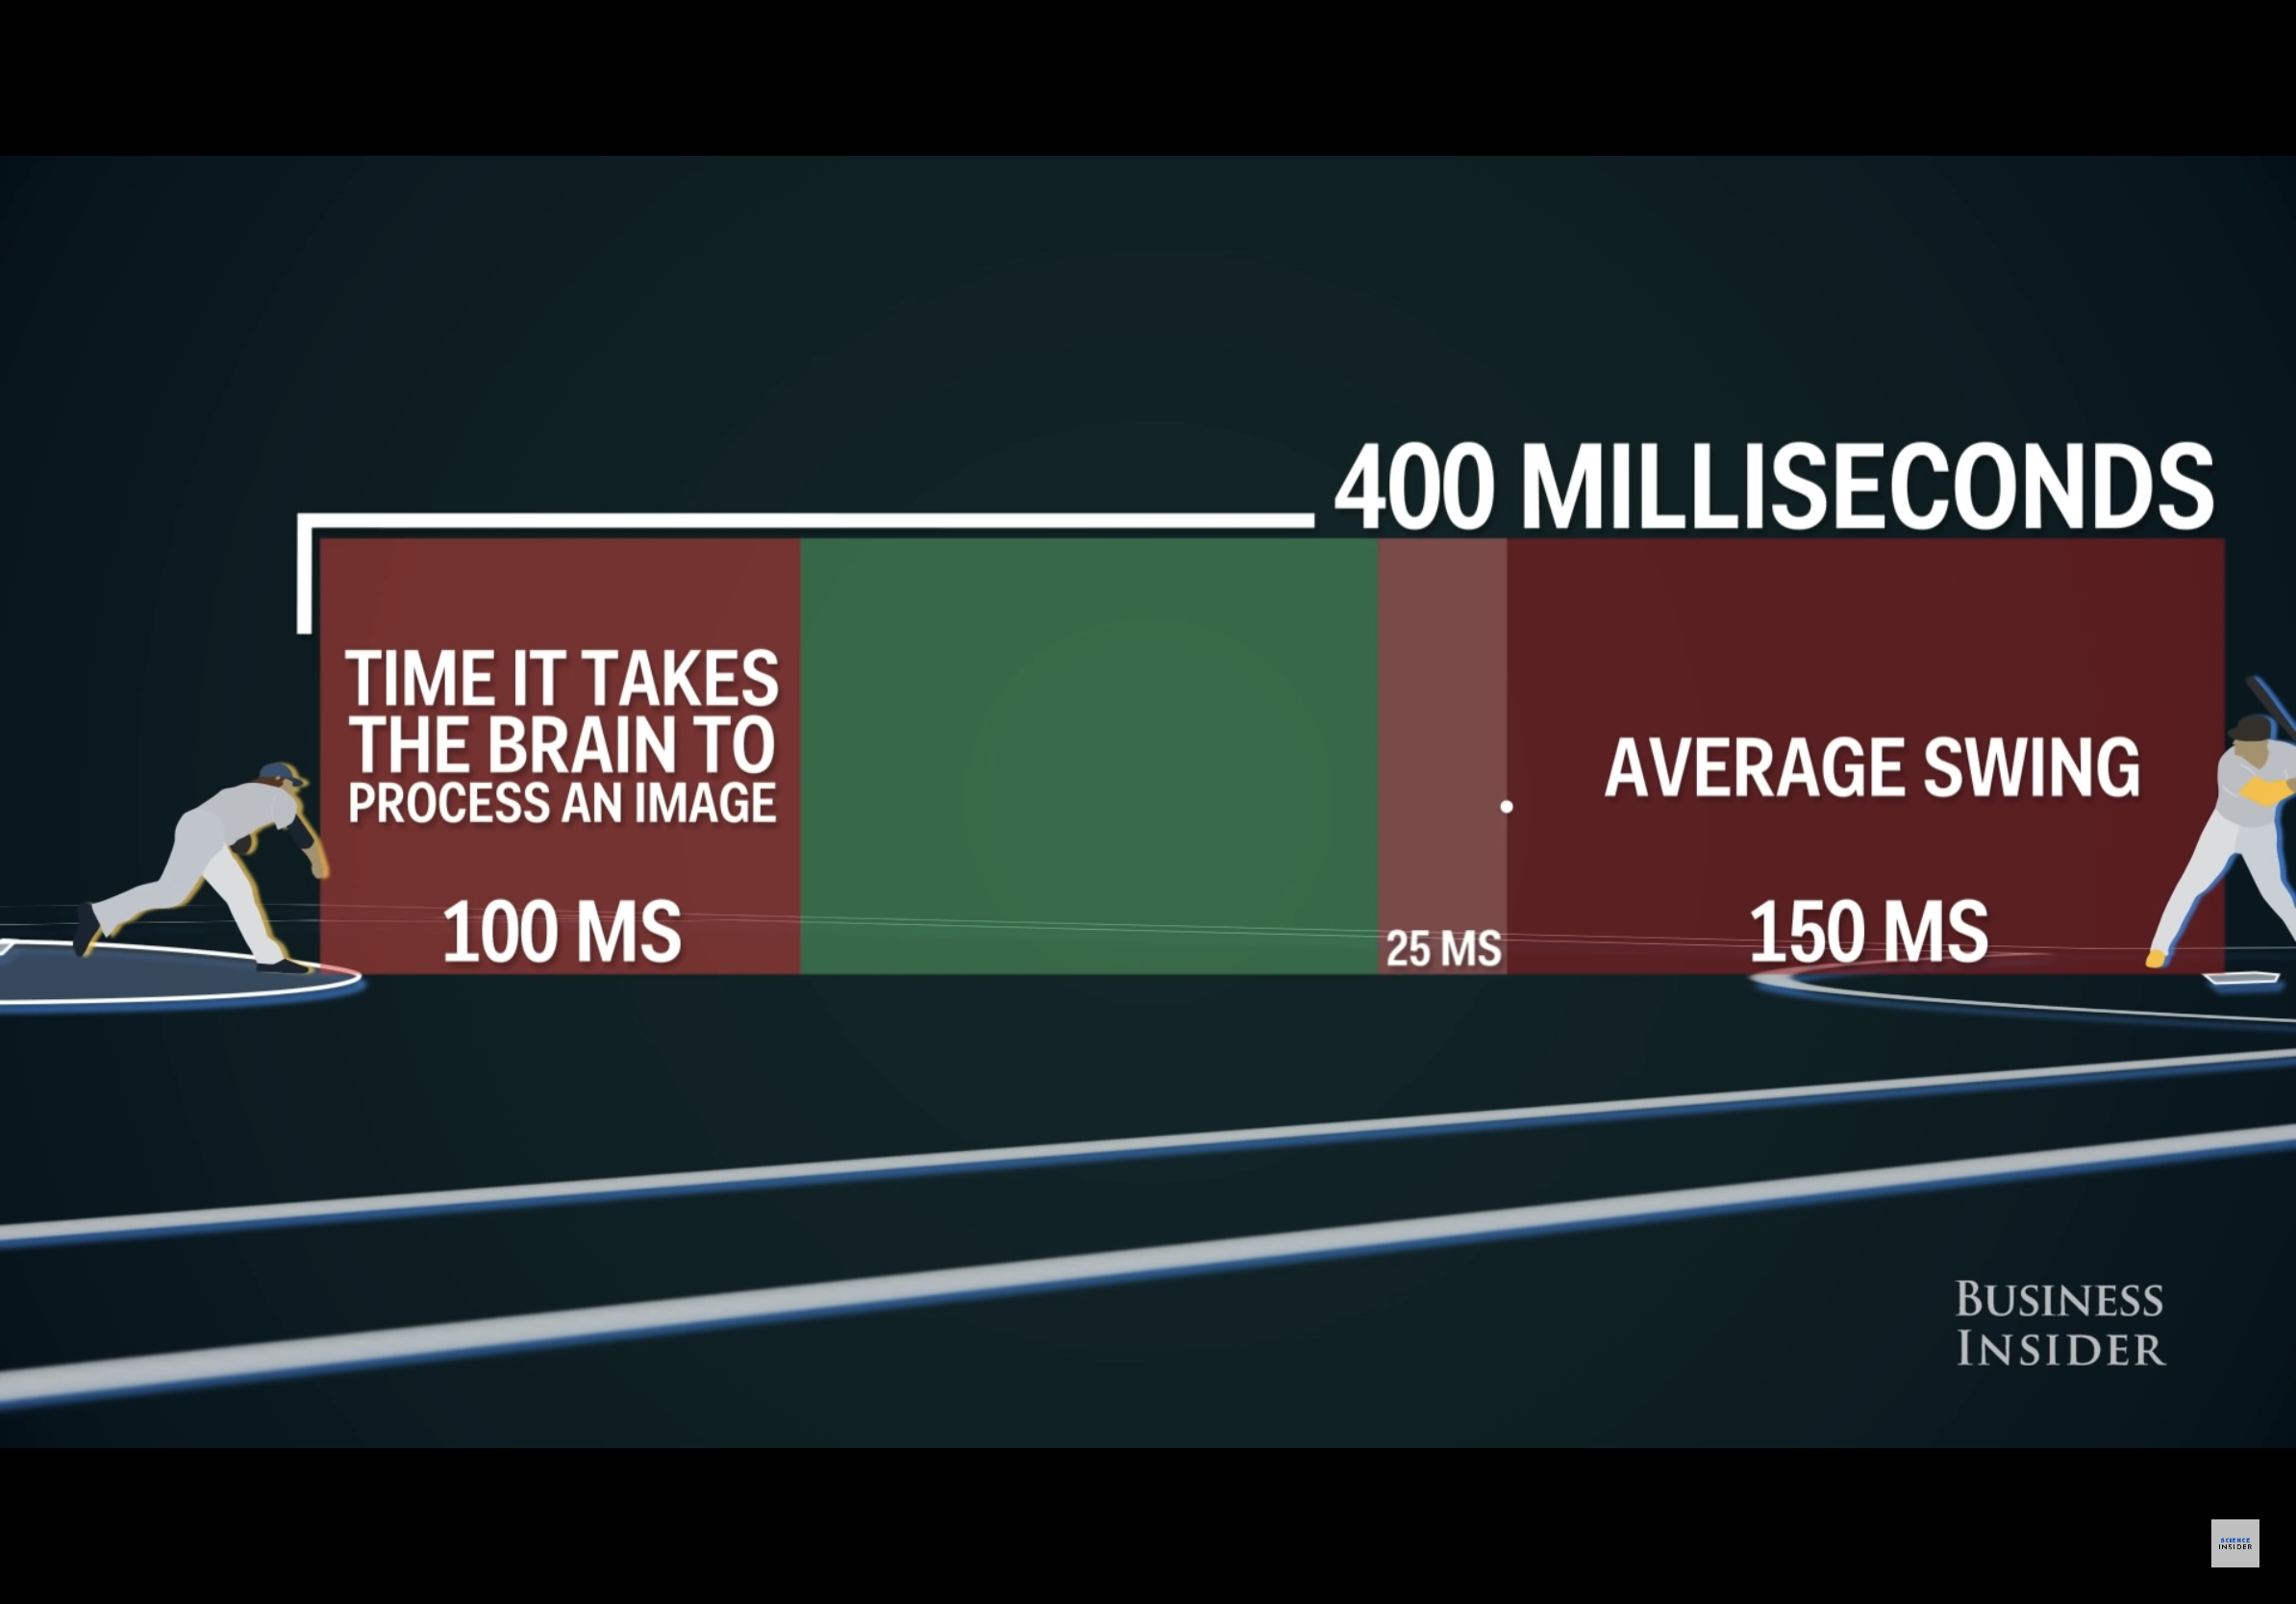
### Stats on the degree of difficulty to hit a baseball:

* It takes 100 milliseconds for a batter to process the image of a pitch
* It takes 25 milliseconds for the brain to tell the player's body to swing
* It takes 150 milliseconds for a batter to swing at a pitch

### What does this information mean?
* There is a remarkable 125 milliseconds to read the pitch as a ball or strike
    - For context, it takes the average human 300-400 milliseconds to blink
    - Most MLB hitters have 20/12 vision (even better than 20/20 vision)




**Input: Pitch Velocity** - How hard, in miles per hour, a pitch is thrown.

<img src="https://img.mlbstatic.com/mlb-images/image/private/t_16x9/t_w1024/mlb/rhuipi62cwlsoko0qwsx
">


**Output: Whiffs** - A swinging strike (referring to the bat whiffing through the air without contacting the ball).

<img src="https://cdn.vox-cdn.com/thumbor/DXaeuIvQ86ih54BrKJiq9C2Yv14=/151x0:3848x2465/1200x800/filters:focal(151x0:3848x2465)/cdn.vox-cdn.com/uploads/chorus_image/image/1058927/149917910.0.jpg">


## Relationship with Starters & Relievers
### Plots

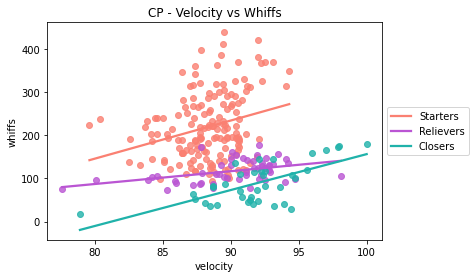

In [19]:
sns.regplot(x="velocity", y="whiffs", ci=None, data = SP_df, scatter_kws={"color": "salmon"}, line_kws={"color": "salmon"}).set(title = 'CP - Velocity vs Whiffs')
sns.regplot(x="velocity", y="whiffs", ci=None, data = RP_df, scatter_kws={"color": "mediumorchid"}, line_kws={"color": "mediumorchid"}).set(title = 'CP - Velocity vs Whiffs')
sns.regplot(x="velocity", y="whiffs", ci=None, data = CP_df, scatter_kws={"color": "lightseagreen"}, line_kws={"color": "lightseagreen"}).set(title = 'CP - Velocity vs Whiffs')
startcloser_labels = ['Starters', 'Relievers', 'Closers']
plt.legend(labels=startcloser_labels, loc='center left', bbox_to_anchor=(1, 0.5))

To better understand which pitcher causes the most whiffs, we will first observe each pitcher's average pitch speed and what percentage of their total pitches are leading to whiffs.

In [20]:
# Within each pitcher data subset, we will be selecting the velocity column in order to find its average
SP_df['velocity'].mean().round(2)

88.38

In [21]:
RP_df['velocity'].mean().round(2)

90.1

In [22]:
CP_df['velocity'].mean().round(2)

91.94

## As mentioned earlier:
* Starters only throw roughly 90 pitches each outing
* Relievers only throw 30 pitches each outing
* Closers only throw around 15 pitches per outing

NOTE: Whiffs is a counting stat, so throwing more pitches will most likely lead to more whiffs. Thus, starters will inherently throw more whiffs.

In [23]:
# First, going to identify what's the average amount of whiffs per pitcher in each dataset

whiff_to_starter = (SP_df['whiffs'].sum()/165).round(2)

whiff_to_reliever = (RP_df['whiffs'].sum()/53).round(2)

whiff_to_closer = (CP_df['whiffs'].sum()/38).round(2)

print("The average number of whiffs for each type of pitcher")
print("Starters:")
print(whiff_to_starter,"whiffs")

print("Relievers:")
print(whiff_to_reliever,"whiffs")

print("Closers:")
print(whiff_to_closer,"whiffs")

The average number of whiffs for each type of pitcher
Starters:
219.93 whiffs
Relievers:
117.04 whiffs
Closers:
89.13 whiffs


In [24]:
# Next we need to identify how many pitchers on average each category of pitchers throws per season
starter_throws = (165 * 90) # on average throws 90 pitches
reliever_throws = (53 * 30) # on average throws 30 pitches
closer_throws = (38 * 15) # on average throws 15 pitches

In [25]:
# Finally, we will divide the # of whiffs for each pitcher cateogry to their total pitches in the season
print("Starters - Whiff Percentage (out of total throws):")
print(((whiff_to_starter/starter_throws)*100).round(2))
print("Relievers - Whiff Percentage (out of total throws):")
print(((whiff_to_reliever/reliever_throws)*100).round(2))
print("Closers - Whiff Percentage (out of total throws):")
print(((whiff_to_closer/closer_throws)*100).round(2))

Starters - Whiff Percentage (out of total throws):
1.48
Relievers - Whiff Percentage (out of total throws):
7.36
Closers - Whiff Percentage (out of total throws):
15.64


# Analysis

When observing the relationship between the three pitching categories, we see a positive relationship between pitch velocity and the number of whiffs. However, in identifying the pitcher group with the most success, it is necessary to first analyze the average pitch speed (mph) in each group.

### Baseball tips to keep in mind:
* Starting pitchers are known to have a variety of pitches and a strong enough velocity to go 5 innings in a game
* Relievers are known to have fewer pitches than a starter, but slightly more pitch velocity within their 3-inning outing
* Closers, only pitching for one inning, are expected to have higher velocity on the 2-3 pitches they throw in the 9th inning

In our analysis, we found our pitch velocity results to be consistent with the baseball tips above: starters throwing on average 88 mph, relievers throwing on average 90 mph, and closers throwing on average 91.9 mph. Despite starters having the highest number of whiffs on average per pitcher, this calculation didn't take into account their total pitches. It turns out that closers have the highest whiff percentage of pitches at 15.6%, compared to relievers at 7.3% and starters at 1.48%.

### Why did these results occur?

The factor that ultimately is driving a higher whiff percentage for closers is their on-average higher velocity of pitches, explaining why starters had the lowest percentage with an average velocity of 88 mph. While velocity is the main force behind creating whiffs and swinging strikes, closers have only a few pitches per game, which allows them to have a higher probability of whiffs than a starter throwing 90 pitches per game.

### Why is there still a sizeable whiff percentage between starters and closers?

Ultimately, with that 3-4 mph difference, the hitter's reaction time is drastically decreased to only a few milliseconds, making all the difference in creating a higher rate of whiffs/swinging strikes.

## Ok....so high velocity closers are highly effective in creating strike outs and whiffs. 
### Which ones within the closer dataset would you recommend to an MLB manager to recruit?

In [26]:
# Create a subset with only the player name, velocity and release extension
closer_subset = CP_df[['player_name', 'velocity', 'whiffs']]

# Create a function within the subset that sorts the values by whiffs
highest_velocity = closer_subset.sort_values('whiffs', ascending=False).head()
highest_velocity

player_name  velocity  whiffs
5   Chapman, Aroldis     100.0     180
20    Hendriks, Liam      98.0     175
9    Clase, Emmanuel      97.9     172
23  Iglesias, Raisel      97.0     167
4        Smith, Will      96.0     160

# Takeaway

As shown in the table above, an upper 90 mph fastball or even over 100 mph is a batter's true achilles heal. Compared to starters and relievers with a lower average velocity, a higher percentage of whiffs and strikeouts will stem from the closers. Closers, having a lot of energy to pitch an inning, come in to secure the game's win and "strike out the side" (a baseball expression for striking out each batter in that inning). Below are clips for the hardest throwing arms in game: Aroldis Chapman (current closer for the NY Yankees who won the World Series with the Chicago Cubs in 2016 and was originally drafted by the Cincinnati Reds).

## Videos of Chapman's hardest thrown pitches
### Here's a clip of Chapman clocking out at 106 mph with a straight heater (aka 2 seam fastball)

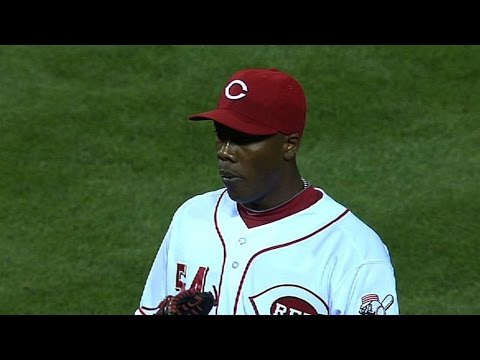

In [27]:
from IPython.display import YouTubeVideo
video1 = YouTubeVideo('Qem3mypA2JI', height=500, width=900, start = 21,end = 44)
display(video1)

The video above was when Chapman faced the National League's Most Valuable Player Andrew McCutchen and absolutely stunned him by a 106 mph fastball.

While this type of pitch is truly spectacular, Chapman and other closers don't just throw high velocity fastballs. Surprisingly, Chapman and other high velocity closers also throw different types of moving pitches at this velocity.

## Chapman's 105 mph slider at age 33

This next video demonstrates Chapman throwing a 105 mph slider at age 33 (a decade later from the first video). Watch closely how the pitch tails off at the end towards the batter, giving no chance for the batter to make any sort of contact with the pitch.

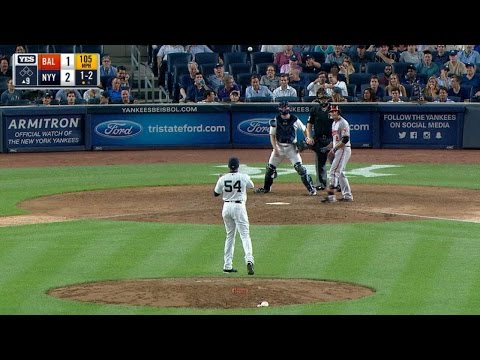

In [28]:
from IPython.display import YouTubeVideo
video2 = YouTubeVideo('Ehlfbyu7TZ8', height=500, width=900, end = 20)
display(video2)

After watching these clips, we will now conduct a further player analysis on some of the hardest throwing arms (the pitchers with the highest velocity and whiffs we previously filtered above).
* Aroldis Chapman
* Liam Hendriks
* Emmanuel Clase

We will see what types of pitches within their arsenal make them highly dominant aside from their top velocity.

# Block 4 - Further Review: Player Data Analysis


<img src="https://s.wsj.net/public/resources/images/BN-NI591_astros_TOP_20160331125009.jpg
">

In [29]:
# Load player datasets

#Oh look it's Blake! Hi Blake!
Treinen_df = pd.read_csv('../data/Project_Data_Files/Project_BlakeTreinen.csv')

#Tyler
Rogers_df = pd.read_csv('../data/Project_Data_Files/Project_TylerRogers.csv')


#Closers
Chapman_df = pd.read_csv('../data/Project_Data_Files/Project_AroldisChapman.csv')
Clase_df = pd.read_csv('../data/Project_Data_Files/Project_Clase.csv')
Hendriks_df = pd.read_csv('../data/Project_Data_Files/Project_LiamHendriks.csv')

## 1 - Pitch arsenal

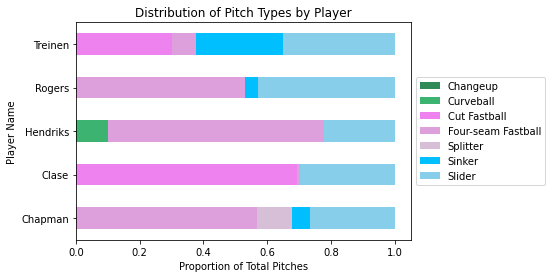

In [30]:
players = ['Chapman', 'Clase', 'Treinen', 'Rogers', 'Hendriks']
player_dfs = [Chapman_df, Clase_df, Treinen_df, Rogers_df, Hendriks_df]

pitch_data = []
for player, pdf in zip(players, player_dfs):
        df=pdf["pitch_type"].value_counts(normalize=True).to_frame()
        df['player']=player
        pitch_data.append(df)

pitch_data_df = pd.concat(pitch_data)

pitch_data_df=pitch_data_df.reset_index()
pitch_data_df.rename(columns={'index': 'pitch_type',
                              'pitch_type': 'value'}, inplace=True)
###

pitch_by_player=pitch_data_df.pivot(index='player', columns='pitch_type', values='value')

###
mylabels=['Changeup', 'Curveball', 'Cut Fastball', 'Four-seam Fastball', 'Splitter', 'Sinker', 'Slider']
pitch_by_player.plot(kind='barh', 
                     stacked=True, color=['seagreen', 'mediumseagreen', 'violet', 'plum', 'thistle', 'deepskyblue', 'skyblue'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=mylabels)
plt.title('Distribution of Pitch Types by Player')
plt.xlabel('Proportion of Total Pitches')
plt.ylabel('Player Name')
plt.show()

### Pitch Type - Mini Takeaway: 

One explanation for Blake Treinen being effective is his diverse pitch mix. Emmanuel Clase, Liam Hendriks, and Aroldis Chapman (our flamethrowers) are on the other end of the spectrum with throwing mainly some variety of a fastball (because they throw it so hard). Rogers is a little different: He throws his slider a lot. He's unique - let's see why!


## 2 - Vertical Release Point - Tyler Rogers' Time to Shine!

Text(0, 0.5, 'Average Vertical Release Point')

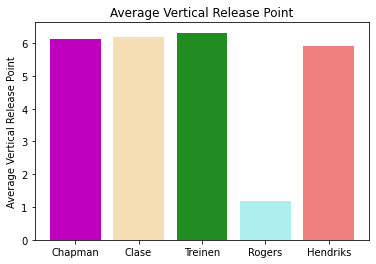

In [31]:
players = ['Chapman', 'Clase', 'Treinen', 'Rogers', 'Hendriks']
player_dfs = [Chapman_df, Clase_df, Treinen_df, Rogers_df, Hendriks_df]

release_data = []
for player, pdf in zip(players, player_dfs):
        release_mean_df=pdf['release_pos_z'].to_frame()
        release_mean=release_mean_df['release_pos_z'].mean()
        release_data.append(release_mean)

release_data
release_plot = plt.bar(players, release_data, color=['m', 'wheat', 'forestgreen', 'paleturquoise', 'lightcoral'])

plt.title('Average Vertical Release Point')
plt.ylabel('Average Vertical Release Point')

### Vertical Release Point - Mini Takeaway: 

* Look at that! Our flamethowers throw from a similar high release around 6 feet off the ground (and Blake Treinen is in a similar situation), but Tyler Rogers is close to 1 foot off the ground. Tyler Rogers is effective because of this unique release point. Cool!


<img src="https://imengine.prod.srp.navigacloud.com/?uuid=ddd55d7c-dd55-5ab2-818c-730ec6ddc8de&type=primary&q=72&width=1024
">


## 3 - Length of at-bat

(3.0, 4.5)

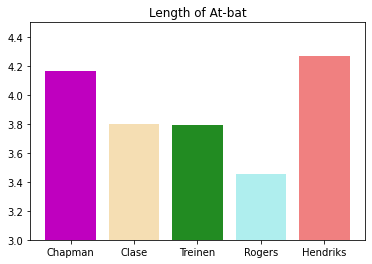

In [39]:
Treinensize_df = Treinen_df.groupby(["des", "game_date"])["pitch_number"].size()
Chapmansize_df = Chapman_df.groupby(["des", "game_date"])["pitch_number"].size()
Rogerssize_df = Rogers_df.groupby(["des", "game_date"])["pitch_number"].size()
Clasesize_df = Clase_df.groupby(["des", "game_date"])["pitch_number"].size()
Hendrikssize_df = Hendriks_df.groupby(["des", "game_date"])["pitch_number"].size()

Rogerssizemean = Rogerssize_df.mean()
Clasesizemean = Clasesize_df.mean()
Hendrikssizemean = Hendrikssize_df.mean()
Chapmansizemean = Chapmansize_df.mean()
Treinensizemean = Treinensize_df.mean()

players = ['Chapman', 'Clase', 'Treinen', 'Rogers', 'Hendriks']
player_means = [Chapmansizemean, Clasesizemean, Treinensizemean, Rogerssizemean, Hendrikssizemean]
player_averages = [4.17, 3.80, 3.79, 3.45, 4.23]

chart = plt.bar(players, player_means, color=['m', 'wheat', 'forestgreen', 'paleturquoise', 'lightcoral'])

plt.title('Length of At-bat')
plt.ylim((3,4.5))
#plt.ylabel('ylabel')

### Length of at-bat - Mini Takeaway: 

Blake Treinen and Tyler Rogers are effective because they are quick! Their at-bats are very short, which is good for a pitcher. Our flamethrowers take longer to complete their at-bats.

## 4 - Strike throwing percentage 

Text(0, 0.5, 'Strike Throwing Percentage (%)')

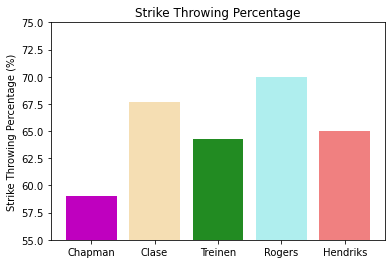

In [33]:
players = ['Chapman', 'Clase', 'Treinen', 'Rogers', 'Hendriks']
player_dfs = [Chapman_df, Clase_df, Treinen_df, Rogers_df, Hendriks_df]


strike_data = []
for player, pdf in zip(players, player_dfs):
        df=pdf["pitch_type"].value_counts(normalize=True).to_frame()
        strike_filt1 = pdf['description']== "foul_bunt"
        strike_filt2 = pdf['description']=="foul_tip"
        strike_filt3 = pdf['description']=="foul"
        strike_filt4 = pdf['description']=="swinging_strike"
        strike_filt5 = pdf['description']=="called_strike"
        strike_filt6 = pdf['description']=="hit_into_play"
        strike_df = pdf[strike_filt1 | strike_filt2 | strike_filt3 | strike_filt4 | strike_filt5 | strike_filt6]

        strike_data.append(( strike_df["description"].count()/pdf["description"].count()) *100)

strike_data

strike_percent = plt.bar(players, strike_data, color=['m', 'wheat', 'forestgreen', 'paleturquoise', 'lightcoral'])
plt.ylim((55,75))
plt.title('Strike Throwing Percentage')
plt.ylabel('Strike Throwing Percentage (%)')

### Strike Throwing Percentage - Mini Takeaway: 

Tyler Rogers throws the most strikes among our group: another reason our quirky submarine pitcher is effective! That being said, there is not as big of a difference regarding strike throwing percentage as there was in other charts we looked at earlier. This could be a topic for future research.

# In a Sentence: Our Project!

After looking at classications of pitchers and their overall trends, we drilled down on five pitchers (including two outliers: Blake Treinen and Tyler Rogers), compared them to three flamethrowers (Emmanuel Clase, Aroldis Chapman, and Liam Hendriks), and showed other aspects of their game (vertical and horziontal release point, pitch mix, and strike throwing ability) to show how they are also effective without having extreme velocity.

To answer our research question, the factors that make a successful pitcher are: wide horizontal release point, low vertical release point, and fast velocity.

<img src="https://pbs.twimg.com/media/FGHzUOCWUAI3fGe?format=jpg&name=medium">
*Movie reference: Moneyball (2011), Starring Brad Pitt, Jonah Hill, Chris Pratt is also in the movie